In [1]:
import tensorflow as tf   

# Display the version
print(tf.__version__)     

# other imports
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout
from tensorflow.keras.layers import GlobalMaxPooling2D, MaxPooling2D
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.models import Model

2.9.1


In [3]:
# Load in the data
cifar10 = tf.keras.datasets.cifar10

# Distribute it to train and test set
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

170498071/170498071 [==============================] - 17s 0us/step
(50000, 32, 32, 3) (50000, 1) (10000, 32, 32, 3) (10000, 1)


In [4]:
# Reduce pixel values
x_train, x_test = x_train / 255.0, x_test / 255.0

# flatten the label values
y_train, y_test = y_train.flatten(), y_test.flatten()

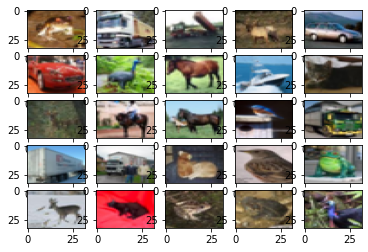

In [5]:
# visualize data by plotting images
fig, ax = plt.subplots(5, 5)
k = 0

for i in range(5):
    for j in range(5):
        ax[i][j].imshow(x_train[k], aspect='auto')
        k += 1

plt.show()

In [6]:
# number of classes
K = len(set(y_train))

# calculate total number of classes 
# for output layer
print("number of classes:", K)

# Build the model using the functional API
# input layer
i = Input(shape=x_train[0].shape)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(i)
x = BatchNormalization()(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)

x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)

x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)

x = Flatten()(x)
x = Dropout(0.2)(x)

# Hidden layer
x = Dense(1024, activation='relu')(x)
x = Dropout(0.2)(x)

# last hidden layer i.e.. output layer
x = Dense(K, activation='softmax')(x)

model = Model(i, x)

# model description
model.summary()

number of classes: 10
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization_1 (Batc  (None, 32, 32, 32)       128       
 hNormalization)                                                 
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16

In [7]:
# Compile
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [8]:
# Fit
r = model.fit(
  x_train, y_train, validation_data=(x_test, y_test), epochs=10)

Epoch 1/10
1563/1563 [==============================] - 82s 51ms/step - loss: 1.3055 - accuracy: 0.5487 - val_loss: 0.9717 - val_accuracy: 0.6589
Epoch 2/10
1563/1563 [==============================] - 80s 51ms/step - loss: 0.8353 - accuracy: 0.7122 - val_loss: 0.9891 - val_accuracy: 0.6612
Epoch 3/10
1563/1563 [==============================] - 78s 50ms/step - loss: 0.6861 - accuracy: 0.7649 - val_loss: 0.7099 - val_accuracy: 0.7623
Epoch 4/10
1563/1563 [==============================] - 85s 55ms/step - loss: 0.5748 - accuracy: 0.8027 - val_loss: 0.6355 - val_accuracy: 0.7881
Epoch 5/10
1563/1563 [==============================] - 85s 54ms/step - loss: 0.4898 - accuracy: 0.8327 - val_loss: 0.7657 - val_accuracy: 0.7681
Epoch 6/10
1563/1563 [==============================] - 80s 51ms/step - loss: 0.4202 - accuracy: 0.8547 - val_loss: 0.6619 - val_accuracy: 0.7899
Epoch 7/10
1563/1563 [==============================] - 76s 49ms/step - loss: 0.3557 - accuracy: 0.8763 - val_loss: 0.5999 -

In [9]:
# Fit with data augmentation
# Note: if you run this AFTER calling
# the previous model.fit()
# it will CONTINUE training where it left off
batch_size = 32
data_generator = tf.keras.preprocessing.image.ImageDataGenerator(
  width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)

train_generator = data_generator.flow(x_train, y_train, batch_size)
steps_per_epoch = x_train.shape[0] // batch_size

r = model.fit(train_generator, validation_data=(x_test, y_test),
              steps_per_epoch=steps_per_epoch, epochs=10)

Epoch 1/10
1562/1562 [==============================] - 92s 59ms/step - loss: 0.6227 - accuracy: 0.7936 - val_loss: 0.5565 - val_accuracy: 0.8170
Epoch 2/10
1562/1562 [==============================] - 89s 57ms/step - loss: 0.5371 - accuracy: 0.8196 - val_loss: 0.6866 - val_accuracy: 0.7782
Epoch 3/10
1562/1562 [==============================] - 90s 57ms/step - loss: 0.5026 - accuracy: 0.8296 - val_loss: 0.4977 - val_accuracy: 0.8321
Epoch 4/10
1562/1562 [==============================] - 85s 54ms/step - loss: 0.4623 - accuracy: 0.8437 - val_loss: 0.4701 - val_accuracy: 0.8428
Epoch 5/10
1562/1562 [==============================] - 87s 56ms/step - loss: 0.4449 - accuracy: 0.8499 - val_loss: 0.4701 - val_accuracy: 0.8425
Epoch 6/10
1562/1562 [==============================] - 88s 57ms/step - loss: 0.4208 - accuracy: 0.8568 - val_loss: 0.5494 - val_accuracy: 0.8222
Epoch 7/10
1562/1562 [==============================] - 97s 62ms/step - loss: 0.4086 - accuracy: 0.8624 - val_loss: 0.5424 -

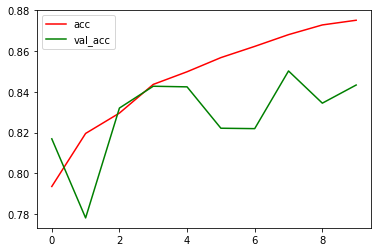

In [10]:
# Plot accuracy per iteration
plt.plot(r.history['accuracy'], label='acc', color='red')
plt.plot(r.history['val_accuracy'], label='val_acc', color='green')
plt.legend()

1/1 [==============================] - 0s 454ms/step
Original label is cat and predicted label is cat


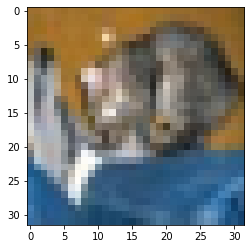

In [11]:
# label mapping

labels = '''airplane automobile bird cat deer dog frog horse ship truck'''.split()

# select the image from our test dataset
image_number = 0

# display the image 
plt.imshow(x_test[image_number])

# load the image in an array
n = np.array(x_test[image_number])

# reshape it
p = n.reshape(1, 32, 32, 3)

# pass in the network for prediction and 
# save the predicted label
predicted_label = labels[model.predict(p).argmax()]

# load the original label
original_label = labels[y_test[image_number]]

# display the result
print("Original label is {} and predicted label is {}".format(
    original_label, predicted_label))